# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [21]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

In [24]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)
# define syn1
syn1 = 2*np.random.random((4,1)) - 1
print(syn1)

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]


[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
[[-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [25]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    print(l1)
    l2 = nonlin(l1*syn1)
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    l2_error = l1 - l2
    l2_delta = l2_error * nonlin(l2,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
     # syn1 update weights
    syn1 += np.dot(l1.T,l2_delta)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

[[0.2689864 ]
 [0.36375058]
 [0.23762817]
 [0.3262757 ]]
[[0.29929909]
 [0.41433436]
 [0.32511054]
 [0.44378327]]
[[0.32550793]
 [0.45332188]
 [0.41995875]
 [0.55437725]]
[[0.34051508]
 [0.46955296]
 [0.49900324]
 [0.63066567]]
[[0.34453622]
 [0.46629908]
 [0.55604975]
 [0.67552479]]
[[0.34157552]
 [0.4518822 ]
 [0.59693803]
 [0.70181072]]
[[0.33500245]
 [0.43242729]
 [0.62778806]
 [0.71837798]]
[[0.3268519 ]
 [0.41146209]
 [0.65246149]
 [0.72995817]]
[[0.31821753]
 [0.39082366]
 [0.67313443]
 [0.73895036]]
[[0.30964355]
 [0.37136802]
 [0.69101331]
 [0.74654974]]
[[0.30137786]
 [0.35341708]
 [0.7067872 ]
 [0.75334332]]
[[0.29351723]
 [0.33702117]
 [0.72087619]
 [0.75961631]]
[[0.2860853 ]
 [0.32210437]
 [0.73355962]
 [0.76550727]]
[[0.27907237]
 [0.30854048]
 [0.7450403 ]
 [0.77108518]]
[[0.27245505]
 [0.29619054]
 [0.7554762 ]
 [0.7763868 ]]
[[0.26620548]
 [0.28492001]
 [0.76499637]
 [0.78143436]]
[[0.26029558]
 [0.27460589]
 [0.77370933]
 [0.78624377]]
[[0.25469877]
 [0.2651388 ]
 [0

[[0.04834718]
 [0.0392094 ]
 [0.96820392]
 [0.9607232 ]]
[[0.04829013]
 [0.03916288]
 [0.96824147]
 [0.96076941]]
[[0.04823327]
 [0.03911652]
 [0.96827888]
 [0.96081546]]
[[0.04817661]
 [0.03907032]
 [0.96831617]
 [0.96086136]]
[[0.04812015]
 [0.03902428]
 [0.96835333]
 [0.96090709]]
[[0.04806387]
 [0.03897839]
 [0.96839036]
 [0.96095268]]
[[0.04800779]
 [0.03893267]
 [0.96842726]
 [0.9609981 ]]
[[0.0479519 ]
 [0.0388871 ]
 [0.96846404]
 [0.96104338]]
[[0.04789619]
 [0.03884168]
 [0.96850069]
 [0.9610885 ]]
[[0.04784067]
 [0.03879642]
 [0.96853722]
 [0.96113347]]
[[0.04778534]
 [0.03875132]
 [0.96857363]
 [0.96117829]]
[[0.0477302 ]
 [0.03870637]
 [0.96860991]
 [0.96122296]]
[[0.04767524]
 [0.03866157]
 [0.96864607]
 [0.96126747]]
[[0.04762046]
 [0.03861692]
 [0.9686821 ]
 [0.96131185]]
[[0.04756586]
 [0.03857242]
 [0.96871802]
 [0.96135607]]
[[0.04751145]
 [0.03852807]
 [0.96875381]
 [0.96140014]]
[[0.04745722]
 [0.03848387]
 [0.96878949]
 [0.96144407]]
[[0.04740316]
 [0.03843982]
 [0

[[0.02862482]
 [0.02320953]
 [0.98113521]
 [0.97670947]]
[[0.0286125 ]
 [0.02319957]
 [0.98114327]
 [0.97671947]]
[[0.0286002 ]
 [0.02318962]
 [0.98115133]
 [0.97672945]]
[[0.02858791]
 [0.02317969]
 [0.98115937]
 [0.97673942]]
[[0.02857564]
 [0.02316976]
 [0.98116741]
 [0.97674938]]
[[0.02856338]
 [0.02315985]
 [0.98117543]
 [0.97675932]]
[[0.02855114]
 [0.02314995]
 [0.98118345]
 [0.97676926]]
[[0.02853891]
 [0.02314007]
 [0.98119145]
 [0.97677918]]
[[0.0285267 ]
 [0.02313019]
 [0.98119945]
 [0.97678908]]
[[0.02851451]
 [0.02312033]
 [0.98120743]
 [0.97679898]]
[[0.02850233]
 [0.02311048]
 [0.98121541]
 [0.97680886]]
[[0.02849016]
 [0.02310065]
 [0.98122337]
 [0.97681873]]
[[0.02847802]
 [0.02309082]
 [0.98123133]
 [0.97682859]]
[[0.02846588]
 [0.02308101]
 [0.98123927]
 [0.97683844]]
[[0.02845376]
 [0.02307121]
 [0.98124721]
 [0.97684827]]
[[0.02844166]
 [0.02306142]
 [0.98125513]
 [0.97685809]]
[[0.02842957]
 [0.02305165]
 [0.98126304]
 [0.9768679 ]]
[[0.0284175 ]
 [0.02304189]
 [0

[[0.02199283]
 [0.01784743]
 [0.98548007]
 [0.98209345]]
[[0.02198717]
 [0.01784285]
 [0.98548378]
 [0.98209805]]
[[0.02198152]
 [0.01783828]
 [0.98548749]
 [0.98210264]]
[[0.02197586]
 [0.01783371]
 [0.9854912 ]
 [0.98210723]]
[[0.02197022]
 [0.01782914]
 [0.9854949 ]
 [0.98211182]]
[[0.02196457]
 [0.01782458]
 [0.9854986 ]
 [0.98211641]]
[[0.02195893]
 [0.01782002]
 [0.9855023 ]
 [0.98212099]]
[[0.0219533 ]
 [0.01781546]
 [0.98550599]
 [0.98212556]]
[[0.02194767]
 [0.01781091]
 [0.98550969]
 [0.98213014]]
[[0.02194204]
 [0.01780636]
 [0.98551338]
 [0.98213471]]
[[0.02193642]
 [0.01780181]
 [0.98551706]
 [0.98213928]]
[[0.0219308 ]
 [0.01779727]
 [0.98552075]
 [0.98214384]]
[[0.02192519]
 [0.01779273]
 [0.98552443]
 [0.9821484 ]]
[[0.02191958]
 [0.0177882 ]
 [0.98552811]
 [0.98215296]]
[[0.02191397]
 [0.01778366]
 [0.98553178]
 [0.98215751]]
[[0.02190837]
 [0.01777913]
 [0.98553545]
 [0.98216206]]
[[0.02190277]
 [0.01777461]
 [0.98553912]
 [0.9821666 ]]
[[0.02189718]
 [0.01777009]
 [0

[[0.0186389 ]
 [0.01513491]
 [0.98768072]
 [0.98481856]]
[[0.01863543]
 [0.01513211]
 [0.987683  ]
 [0.98482137]]
[[0.01863196]
 [0.0151293 ]
 [0.98768528]
 [0.98482419]]
[[0.0186285 ]
 [0.0151265 ]
 [0.98768755]
 [0.98482701]]
[[0.01862504]
 [0.0151237 ]
 [0.98768983]
 [0.98482982]]
[[0.01862158]
 [0.0151209 ]
 [0.9876921 ]
 [0.98483264]]
[[0.01861812]
 [0.0151181 ]
 [0.98769437]
 [0.98483545]]
[[0.01861466]
 [0.0151153 ]
 [0.98769664]
 [0.98483826]]
[[0.0186112 ]
 [0.01511251]
 [0.98769891]
 [0.98484107]]
[[0.01860775]
 [0.01510971]
 [0.98770118]
 [0.98484387]]
[[0.0186043 ]
 [0.01510692]
 [0.98770345]
 [0.98484668]]
[[0.01860085]
 [0.01510413]
 [0.98770571]
 [0.98484948]]
[[0.0185974 ]
 [0.01510134]
 [0.98770797]
 [0.98485229]]
[[0.01859395]
 [0.01509855]
 [0.98771024]
 [0.98485509]]
[[0.01859051]
 [0.01509577]
 [0.9877125 ]
 [0.98485789]]
[[0.01858707]
 [0.01509298]
 [0.98771476]
 [0.98486068]]
[[0.01858363]
 [0.0150902 ]
 [0.98771702]
 [0.98486348]]
[[0.01858019]
 [0.01508742]
 [0

[[0.01642759]
 [0.01334555]
 [0.98913352]
 [0.98661623]]
[[0.0164252 ]
 [0.01334362]
 [0.98913508]
 [0.98661817]]
[[0.01642282]
 [0.01334169]
 [0.98913665]
 [0.98662011]]
[[0.01642043]
 [0.01333976]
 [0.98913822]
 [0.98662205]]
[[0.01641805]
 [0.01333783]
 [0.98913978]
 [0.98662399]]
[[0.01641567]
 [0.01333591]
 [0.98914135]
 [0.98662592]]
[[0.01641329]
 [0.01333398]
 [0.98914291]
 [0.98662786]]
[[0.01641091]
 [0.01333205]
 [0.98914448]
 [0.98662979]]
[[0.01640853]
 [0.01333013]
 [0.98914604]
 [0.98663173]]
[[0.01640615]
 [0.01332821]
 [0.9891476 ]
 [0.98663366]]
[[0.01640378]
 [0.01332628]
 [0.98914917]
 [0.98663559]]
[[0.0164014 ]
 [0.01332436]
 [0.98915073]
 [0.98663752]]
[[0.01639903]
 [0.01332244]
 [0.98915229]
 [0.98663945]]
[[0.01639666]
 [0.01332052]
 [0.98915385]
 [0.98664138]]
[[0.01639428]
 [0.0133186 ]
 [0.98915541]
 [0.98664331]]
[[0.01639191]
 [0.01331668]
 [0.98915697]
 [0.98664524]]
[[0.01638954]
 [0.01331476]
 [0.98915852]
 [0.98664717]]
[[0.01638717]
 [0.01331284]
 [0

[[0.01488034]
 [0.01209292]
 [0.99015107]
 [0.98787454]]
[[0.01487856]
 [0.01209148]
 [0.99015224]
 [0.98787599]]
[[0.01487679]
 [0.01209004]
 [0.99015341]
 [0.98787744]]
[[0.01487501]
 [0.0120886 ]
 [0.99015458]
 [0.98787888]]
[[0.01487323]
 [0.01208717]
 [0.99015575]
 [0.98788033]]
[[0.01487146]
 [0.01208573]
 [0.99015692]
 [0.98788177]]
[[0.01486968]
 [0.01208429]
 [0.99015809]
 [0.98788321]]
[[0.01486791]
 [0.01208285]
 [0.99015925]
 [0.98788466]]
[[0.01486613]
 [0.01208142]
 [0.99016042]
 [0.9878861 ]]
[[0.01486436]
 [0.01207998]
 [0.99016159]
 [0.98788754]]
[[0.01486259]
 [0.01207855]
 [0.99016275]
 [0.98788898]]
[[0.01486082]
 [0.01207711]
 [0.99016392]
 [0.98789043]]
[[0.01485905]
 [0.01207568]
 [0.99016508]
 [0.98789187]]
[[0.01485727]
 [0.01207424]
 [0.99016625]
 [0.98789331]]
[[0.0148555 ]
 [0.01207281]
 [0.99016741]
 [0.98789475]]
[[0.01485374]
 [0.01207138]
 [0.99016858]
 [0.98789619]]
[[0.01485197]
 [0.01206994]
 [0.99016974]
 [0.98789762]]
[[0.0148502 ]
 [0.01206851]
 [0

[[0.01362688]
 [0.01107768]
 [0.99097613]
 [0.98889424]]
[[0.01362551]
 [0.01107657]
 [0.99097703]
 [0.98889536]]
[[0.01362414]
 [0.01107546]
 [0.99097793]
 [0.98889647]]
[[0.01362277]
 [0.01107435]
 [0.99097883]
 [0.98889758]]
[[0.0136214 ]
 [0.01107324]
 [0.99097973]
 [0.9888987 ]]
[[0.01362004]
 [0.01107214]
 [0.99098063]
 [0.98889981]]
[[0.01361867]
 [0.01107103]
 [0.99098153]
 [0.98890092]]
[[0.0136173 ]
 [0.01106992]
 [0.99098243]
 [0.98890203]]
[[0.01361594]
 [0.01106881]
 [0.99098333]
 [0.98890314]]
[[0.01361457]
 [0.01106771]
 [0.99098423]
 [0.98890426]]
[[0.01361321]
 [0.0110666 ]
 [0.99098513]
 [0.98890537]]
[[0.01361184]
 [0.0110655 ]
 [0.99098603]
 [0.98890648]]
[[0.01361048]
 [0.01106439]
 [0.99098693]
 [0.98890759]]
[[0.01360911]
 [0.01106329]
 [0.99098783]
 [0.9889087 ]]
[[0.01360775]
 [0.01106218]
 [0.99098872]
 [0.98890981]]
[[0.01360638]
 [0.01106108]
 [0.99098962]
 [0.98891092]]
[[0.01360502]
 [0.01105997]
 [0.99099052]
 [0.98891202]]
[[0.01360366]
 [0.01105887]
 [0

[[0.01270464]
 [0.01033042]
 [0.9915836 ]
 [0.98964467]]
[[0.01270353]
 [0.01032952]
 [0.99158433]
 [0.98964557]]
[[0.01270242]
 [0.01032862]
 [0.99158506]
 [0.98964648]]
[[0.01270131]
 [0.01032772]
 [0.99158579]
 [0.98964738]]
[[0.0127002 ]
 [0.01032682]
 [0.99158653]
 [0.98964828]]
[[0.01269909]
 [0.01032592]
 [0.99158726]
 [0.98964919]]
[[0.01269798]
 [0.01032502]
 [0.99158799]
 [0.98965009]]
[[0.01269687]
 [0.01032412]
 [0.99158872]
 [0.98965099]]
[[0.01269576]
 [0.01032322]
 [0.99158945]
 [0.9896519 ]]
[[0.01269465]
 [0.01032232]
 [0.99159018]
 [0.9896528 ]]
[[0.01269354]
 [0.01032142]
 [0.99159091]
 [0.9896537 ]]
[[0.01269243]
 [0.01032052]
 [0.99159164]
 [0.9896546 ]]
[[0.01269132]
 [0.01031963]
 [0.99159237]
 [0.98965551]]
[[0.01269021]
 [0.01031873]
 [0.9915931 ]
 [0.98965641]]
[[0.01268911]
 [0.01031783]
 [0.99159383]
 [0.98965731]]
[[0.012688  ]
 [0.01031693]
 [0.99159456]
 [0.98965821]]
[[0.01268689]
 [0.01031604]
 [0.99159529]
 [0.98965911]]
[[0.01268579]
 [0.01031514]
 [0

 [0.99029035]]
[[0.01191037]
 [0.00968663]
 [0.99210709]
 [0.99029109]]
[[0.01190945]
 [0.00968589]
 [0.99210769]
 [0.99029184]]
[[0.01190853]
 [0.00968514]
 [0.9921083 ]
 [0.99029259]]
[[0.01190762]
 [0.0096844 ]
 [0.9921089 ]
 [0.99029333]]
[[0.0119067 ]
 [0.00968366]
 [0.99210951]
 [0.99029408]]
[[0.01190578]
 [0.00968291]
 [0.99211011]
 [0.99029482]]
[[0.01190487]
 [0.00968217]
 [0.99211071]
 [0.99029557]]
[[0.01190395]
 [0.00968143]
 [0.99211132]
 [0.99029632]]
[[0.01190304]
 [0.00968069]
 [0.99211192]
 [0.99029706]]
[[0.01190212]
 [0.00967995]
 [0.99211253]
 [0.99029781]]
[[0.01190121]
 [0.0096792 ]
 [0.99211313]
 [0.99029855]]
[[0.01190029]
 [0.00967846]
 [0.99211373]
 [0.9902993 ]]
[[0.01189938]
 [0.00967772]
 [0.99211434]
 [0.99030004]]
[[0.01189846]
 [0.00967698]
 [0.99211494]
 [0.99030078]]
[[0.01189755]
 [0.00967624]
 [0.99211554]
 [0.99030153]]
[[0.01189663]
 [0.0096755 ]
 [0.99211614]
 [0.99030227]]
[[0.01189572]
 [0.00967475]
 [0.99211675]
 [0.99030302]]
[[0.01189481]
 [

[[0.011271  ]
 [0.00916824]
 [0.9925287 ]
 [0.99081154]]
[[0.01127022]
 [0.00916761]
 [0.99252922]
 [0.99081217]]
[[0.01126944]
 [0.00916698]
 [0.99252973]
 [0.9908128 ]]
[[0.01126867]
 [0.00916635]
 [0.99253024]
 [0.99081344]]
[[0.01126789]
 [0.00916572]
 [0.99253076]
 [0.99081407]]
[[0.01126711]
 [0.00916509]
 [0.99253127]
 [0.9908147 ]]
[[0.01126633]
 [0.00916446]
 [0.99253178]
 [0.99081534]]
[[0.01126556]
 [0.00916383]
 [0.9925323 ]
 [0.99081597]]
[[0.01126478]
 [0.0091632 ]
 [0.99253281]
 [0.9908166 ]]
[[0.011264  ]
 [0.00916257]
 [0.99253332]
 [0.99081723]]
[[0.01126322]
 [0.00916194]
 [0.99253383]
 [0.99081787]]
[[0.01126245]
 [0.00916131]
 [0.99253434]
 [0.9908185 ]]
[[0.01126167]
 [0.00916068]
 [0.99253486]
 [0.99081913]]
[[0.0112609 ]
 [0.00916005]
 [0.99253537]
 [0.99081976]]
[[0.01126012]
 [0.00915942]
 [0.99253588]
 [0.99082039]]
[[0.01125934]
 [0.00915879]
 [0.99253639]
 [0.99082103]]
[[0.01125857]
 [0.00915816]
 [0.9925369 ]
 [0.99082166]]
[[0.01125779]
 [0.00915753]
 [0

[[0.01068005]
 [0.00868898]
 [0.99291857]
 [0.99129264]]
[[0.01067938]
 [0.00868844]
 [0.99291901]
 [0.99129318]]
[[0.01067872]
 [0.00868791]
 [0.99291945]
 [0.99129372]]
[[0.01067806]
 [0.00868737]
 [0.99291988]
 [0.99129426]]
[[0.0106774 ]
 [0.00868683]
 [0.99292032]
 [0.9912948 ]]
[[0.01067673]
 [0.00868629]
 [0.99292076]
 [0.99129534]]
[[0.01067607]
 [0.00868576]
 [0.9929212 ]
 [0.99129587]]
[[0.01067541]
 [0.00868522]
 [0.99292163]
 [0.99129641]]
[[0.01067475]
 [0.00868468]
 [0.99292207]
 [0.99129695]]
[[0.01067409]
 [0.00868414]
 [0.99292251]
 [0.99129749]]
[[0.01067342]
 [0.00868361]
 [0.99292294]
 [0.99129803]]
[[0.01067276]
 [0.00868307]
 [0.99292338]
 [0.99129857]]
[[0.0106721 ]
 [0.00868253]
 [0.99292382]
 [0.99129911]]
[[0.01067144]
 [0.008682  ]
 [0.99292425]
 [0.99129965]]
[[0.01067078]
 [0.00868146]
 [0.99292469]
 [0.99130018]]
[[0.01067012]
 [0.00868093]
 [0.99292512]
 [0.99130072]]
[[0.01066946]
 [0.00868039]
 [0.99292556]
 [0.99130126]]
[[0.0106688 ]
 [0.00867985]
 [0

[[0.01021314]
 [0.00831022]
 [0.99322673]
 [0.9916728 ]]
[[0.01021256]
 [0.00830975]
 [0.99322712]
 [0.99167328]]
[[0.01021198]
 [0.00830928]
 [0.9932275 ]
 [0.99167375]]
[[0.0102114 ]
 [0.00830881]
 [0.99322788]
 [0.99167422]]
[[0.01021082]
 [0.00830834]
 [0.99322826]
 [0.99167469]]
[[0.01021024]
 [0.00830787]
 [0.99322865]
 [0.99167517]]
[[0.01020966]
 [0.0083074 ]
 [0.99322903]
 [0.99167564]]
[[0.01020908]
 [0.00830693]
 [0.99322941]
 [0.99167611]]
[[0.0102085 ]
 [0.00830646]
 [0.99322979]
 [0.99167658]]
[[0.01020792]
 [0.00830599]
 [0.99323018]
 [0.99167705]]
[[0.01020734]
 [0.00830552]
 [0.99323056]
 [0.99167752]]
[[0.01020676]
 [0.00830505]
 [0.99323094]
 [0.991678  ]]
[[0.01020618]
 [0.00830458]
 [0.99323132]
 [0.99167847]]
[[0.0102056 ]
 [0.00830411]
 [0.99323171]
 [0.99167894]]
[[0.01020502]
 [0.00830364]
 [0.99323209]
 [0.99167941]]
[[0.01020444]
 [0.00830317]
 [0.99323247]
 [0.99167988]]
[[0.01020386]
 [0.0083027 ]
 [0.99323285]
 [0.99168035]]
[[0.01020329]
 [0.00830223]
 [0

 [0.99203321]]
[[0.00977004]
 [0.00795071]
 [0.99351928]
 [0.99203362]]
[[0.00976953]
 [0.0079503 ]
 [0.99351961]
 [0.99203403]]
[[0.00976902]
 [0.00794988]
 [0.99351995]
 [0.99203445]]
[[0.00976851]
 [0.00794947]
 [0.99352029]
 [0.99203486]]
[[0.00976801]
 [0.00794906]
 [0.99352062]
 [0.99203528]]
[[0.0097675 ]
 [0.00794865]
 [0.99352096]
 [0.99203569]]
[[0.00976699]
 [0.00794823]
 [0.99352129]
 [0.9920361 ]]
[[0.00976648]
 [0.00794782]
 [0.99352163]
 [0.99203652]]
[[0.00976597]
 [0.00794741]
 [0.99352196]
 [0.99203693]]
[[0.00976547]
 [0.007947  ]
 [0.9935223 ]
 [0.99203734]]
[[0.00976496]
 [0.00794659]
 [0.99352263]
 [0.99203776]]
[[0.00976445]
 [0.00794617]
 [0.99352297]
 [0.99203817]]
[[0.00976394]
 [0.00794576]
 [0.9935233 ]
 [0.99203858]]
[[0.00976344]
 [0.00794535]
 [0.99352364]
 [0.992039  ]]
[[0.00976293]
 [0.00794494]
 [0.99352397]
 [0.99203941]]
[[0.00976242]
 [0.00794453]
 [0.99352431]
 [0.99203982]]
[[0.00976191]
 [0.00794412]
 [0.99352464]
 [0.99204024]]
[[0.00976141]
 [

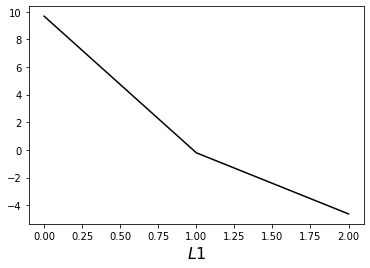

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()